<h3> TKO_7093 korotusprojekti </h3>

In [1]:
__auth__ = 'Jeremias Shadbolt'
__email__ = 'jrshad@utu.fi'
__student_number__ = '1900386'

In [78]:
'''
Libraries
'''
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

<h5> Variables and their descriptions </h5>

In [3]:
'''
Variable            Description

ticket              ticket type
cost                paid fee in euros
month               calendar month during which the trip was made
location_from       start location of the trip
location_to         end location of the trip
duration            travel time in seconds
distance            travel distance in meters
assistance          status of electric assistance (0 = disabled, 1 = enabled)
energy_used         energy consumed by the bike in watt-hours
energy_collected    energy collected by the bike in watt-hours
'''
print()

<h5> Tasks </h5>

<h6> Data preparation </h6>
    
<br>The file bikes.data contains data that was collected directly from the recording devices of the bikes. No preprocessing or filtering has been done. The data may therefore contain irrelevant records, such as customers only trying out how bikes can be rented with our Android app and cancelling the transaction without actually riding the bike. Furthermore, the maintenance team reported that they had quite a few technical problems with the bikes, which may have resulted in invalid values in the data. So, you need to load and clean up the data before you can perform the statistical analysis.

<br>(2p) Load the data from the file bikes.data. Check that the variables match the documentation above.

<br>(6p) Use both visualisations and numerical summaries to explore the variables. Filter out irrelevant records and process invalid values, if any. Explain why the records are irrelevant or the values invalid. Also explain how the modifications you made to the data fix the problems.

<h6> Data exploration </h6>

<br>It is vital to know what our customers are like and how they use our bikes. We are particularly interested in characterising the users of the three ticket types (single, season and savonia). Explore the data to discover how the rental bikes were used during the time period at which the data was collected. Remember to examine your results, summarise your findings and point out any interesting discoveries in your report.</br>

<br>The marketing team is interested in knowing how much the bikes were used under each ticket type. They believe that they can use the information to improve our advertisement campaigns and consequently increase our revenue.</br>

<br>(4p) For each ticket type, calculate the number of trips made, the total distance travelled, the total time travelled and the total amount of fees paid. Examine your results and make comments about the customers.</br>

<br>(4p) For each ticket type, visualise the monthly rental activity in terms of the total distance travelled. Examine your results and make comments about the development of the rental activity over time.</br>

<br>The logistics team transported bikes between renting stations in order to balance their availability, but they struggled to maintain a decent number of bikes available at each station. To optimise the transport operation, the logistics team needs to know which stations tend to get depleted of bikes and which stations tend to accumulate bikes. While transporting bikes, they also noticed that quite often the bikes had fully discharged batteries. We need to upgrade our charging stations to keep them charged. For that, we need to know how much battery levels tend to change during trips.</br>

<br>(4p) Find the three stations that have the highest total deficit of bikes (i.e. the largest negative difference between the number of arrived bikes and the number of departured bikes) and the three stations that have the highest total surplus of bikes (i.e. the largest positive difference). Examine your results and make suggestions about how bikes could be relocated.</br>

<br>(4p) For each trip in the data set, calculate its net energy gain, which is defined as the difference between the energy collected and consumed during a trip. Visualise the distribution of this new variable. Make comments about how much battery levels tend to change during trips.</br>

<h6> Hypothesis testing </h6>

<br>There are a few hypotheses that we want to study about our customers and the trips they make. You need to examine whether the data has statistical evidence to support them. The tasks are detailed below. The other teams will want to double-check your analysis, so in your report remember to justify your choices of statistical tests, interpret the p-values, and make conclusions about the customers and their trips.</br>

<br>The marketing team has made a hypothesis that trip durations tend to be different between the customers who have a season ticket and the customers who buy single tickets. They also believe that the longer the trip, the higher the rate of electricity consumption tends to be. If we can find evidence for these hypotheses, the marketing team could use the information in the future advertisement campaigns.</br>

<br>(4p) Is there statistical evidence to claim that the travel times tend to be shorter or longer for the single than for the season ticket type. Justify your design choices, interpret the results and use your discoveries to make conclusions about customers.</br>

<br>(4p) Is there statistical evidence to claim that the travel distance positively correlates with the average rate at which electricity is consumed during the trip? Justify your design choices, interpret the results and use your discoveries to make conclusions about customers.</br>

<br>We will acquire some non-electric bikes for the next year to supplement our fleet. We need to offer them to those customers who are less likely to need electric assistance. The logistics team has a hypothesis that the Savonia students differ from the other customers with this respect.</br>

<br>(4p) Is there statistical evidence to claim that the savonia ticket type differs from the others with respect to how often the electric assistance is used? Justify your design choices, interpret the results and use your discoveries to make conclusions about customers.</br>

<h6> Future directions </h6>

<br>The statistical analysis outlined above is definitely not perfect. There must be plenty of other hypotheses that could be examined to improve our rental operations, and the questions we ask above could perhaps be tweaked to better address the needs we have. Since the marketing, logistics and maintenance teams could not come up with other hypotheses or further adjustments, it is up to you to propose improvements to the analysis.</br>

<br>(2p) Choose either (A) or (B) below.</br>

<br>(A) Formulate your own hypothesis about the use of rental electric bikes. Explain why your hypothesis would be important to explore. Describe how the hypothesis could be tested. (You do not have to perform the analysis.)</br>

<br>(B) Point out one or more problems in the questions asked or the approaches used above. Propose changes to address the problem(s). Explain how the changes would improve the statistical analysis.</br>

<h5> Get data Path</h5>

In [4]:
path = 'bikes.data'

<h3> Data Preparation </h3>

In [5]:
'''
Load the data from the file bikes.data. Check that the variables match the documentation above.
'''
bikes = pd.read_csv(path)

<h6> Load the data from the file bikes.data. Check that the variables match the documentation above.</h6>

In [6]:
bikes.sample(5)

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
430,savonia,0.00,9,MICROTEKNIA,MICROTEKNIA,12.0,0,0,0.0,0.0
616,season,0.00,9,PUIJONLAAKSO,PUIJONLAAKSO,53.0,0,1,0.0,0.0
908,single,0.35,5,TORI,KYS,374.0,1870,1,15.9,1.5
1501,single,4.80,6,KAUPPAKATU,KAUPPAKATU,5722.0,3150,1,21.6,6.0
1771,season,0.00,7,TORI,TORI,61.0,0,1,0.0,0.0


In [7]:
bikes.describe()

,cost,month,duration,distance,assistance,energy_used,energy_collected
count,1774.000000,1774.000000,1774.000000,1774.000000,1774.000000,1774.000000,1774.000000
mean,0.491234,7.233371,671.323563,2460.067644,0.916009,17.399493,5.639290
std,4.127344,1.720351,1141.708627,2352.529305,0.277452,17.194463,6.379593
min,0.000000,4.000000,2.000000,-3380.000000,0.000000,0.000000,0.000000
25%,0.000000,6.000000,245.250000,910.000000,1.000000,1.425000,0.600000
50%,0.050000,7.000000,546.500000,2030.000000,1.000000,14.350000,3.900000
75%,0.550000,9.000000,877.750000,3605.000000,1.000000,26.900000,8.325000
max,100.000000,10.000000,25614.000000,20770.000000,1.000000,144.900000,56.400000


In [8]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1774 entries, 0 to 1773
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ticket            1774 non-null   object 
 1   cost              1774 non-null   float64
 2   month             1774 non-null   int64  
 3   location_from     1774 non-null   object 
 4   location_to       1774 non-null   object 
 5   duration          1774 non-null   float64
 6   distance          1774 non-null   int64  
 7   assistance        1774 non-null   int64  
 8   energy_used       1774 non-null   float64
 9   energy_collected  1774 non-null   float64
dtypes: float64(4), int64(3), object(3)
memory usage: 138.7+ KB


In [9]:
# Verify ticket types are as described
bikes['ticket'].unique()

array(['single', 'savonia', 'season'], dtype=object)

Based on initial analysis done above the columns are as described, there are no null values and most of the numerical values seem to be within reasonable ranges.

However, distance seems to have a minimum value of -3380 which hardly makes sense. Also the sample() above shows that there's another entry with a negative distance although the starting and ending points are the same. This could indicate that the user unlocked the bike and decided against using it. Cost also seems to have a maximum value of 100 which seems odd.

<h6> Use both visualisations and numerical summaries to explore the variables. Filter out irrelevant records and process invalid values, if any. Explain why the records are irrelevant or the values invalid. Also explain how the modifications you made to the data fix the problems. </h6>

In [10]:
# Numerical columns
num_cols = bikes.select_dtypes(include = ['number']).columns

In [11]:
num_cols

Index(['cost', 'month', 'duration', 'distance', 'assistance', 'energy_used',
       'energy_collected'],
      dtype='object')

One way to approach this problem is to go through each numerical column individually and try to find any irregularities. 

First, however, get a grasp with boxplots.

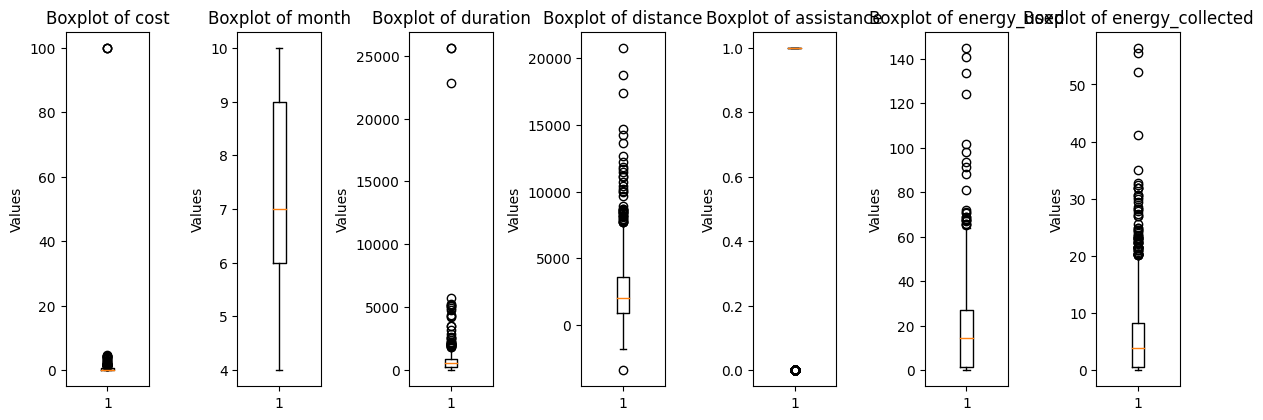

In [12]:
# Create separate boxplots for each numerical column
plt.figure(figsize=(12, 8))

for i, column in enumerate(num_cols):
    plt.subplot(2, len(num_cols), i+1) 
    plt.boxplot(bikes[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel('Values')

plt.tight_layout()
plt.show()

As shown with describe, there are outliers within cost and duration.

In [13]:
'''
Analysis for cost

https://kaupunkipyorat.kuopio.fi/hinnasto.html used as reference
'''
# Check for instances where cost is <= 0 and ticket type isn't savonia or season since based on their website
# season and savonia tickets are paid once in beforehand and it's reasonable to assume this is the case here
print(f"Amount of incorrectly charged single tickets: {len(bikes[(bikes['cost'] <= 0) & (bikes['ticket'] == 'single')])}")

# Describe() showed a cost max of 100. This could indicate something. Check out all costs over 5 euros
bikes[bikes['cost'] > 5]

Amount of incorrectly charged single tickets: 0


,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
100,savonia,100.0,9,NEULAMÄKI,MICROTEKNIA,25614.0,2310,0,0.0,3.6
609,savonia,100.0,9,NEULAMÄKI,MICROTEKNIA,25614.0,2310,0,0.0,3.6
1231,single,100.0,6,TASAVALLANKATU,PIRTTI,22793.0,14690,1,91.3,6.3


For some reason, there are still costs within Savonia-ticket, so apparently my hypothesis of Savonia tickets being paid in beforehand was false. Check into this

However, the unreasonably high ticket prices seem to be from quite a long rental time. Could it be that the users forgot to turn off the renting? According to the website, Savonia ticket gives unlimited instances of 30 minutes of free riding. 

Since duration was measured in seconds let's turn the seconds into minutes to ease handling

In [14]:
long_durations = bikes[bikes['cost'] > 5].copy()

In [15]:
# turn durations into minutes and subtract the free 30 minutes
long_durations['duration'] = long_durations['duration'] // 60
long_durations['duration'] = long_durations['duration'] - 30

In [16]:
# calculate whether the total cost is accurate with the formula described on website: 10 cents / minute
long_durations['calculated_cost'] = long_durations['duration'] * 0.10

In [17]:
long_durations

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected,calculated_cost
100,savonia,100.0,9,NEULAMÄKI,MICROTEKNIA,396.0,2310,0,0.0,3.6,39.6
609,savonia,100.0,9,NEULAMÄKI,MICROTEKNIA,396.0,2310,0,0.0,3.6,39.6
1231,single,100.0,6,TASAVALLANKATU,PIRTTI,349.0,14690,1,91.3,6.3,34.9


In [18]:
# Drop the unreasonably high cost trips so they don't affect further calculations
bikes = bikes[bikes['cost'] < 5]

Calculated costs do not add up to the initial cost. Could be a good idea to contact Kuopio about this. The last instance also used a lot more energy than they collected. Could it be the bike is somewhat faulty?

Later edit: it seems that there's a fee for late return which explains these outliers.

Median and mean cost per ticket

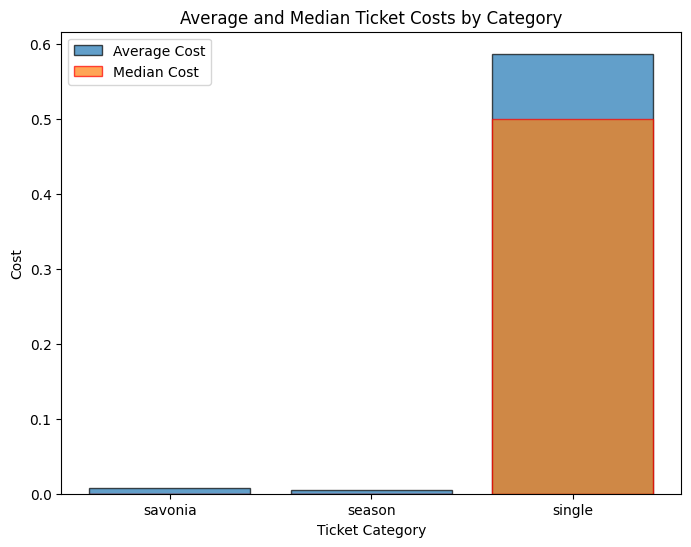

In [39]:
# Group the DataFrame by 'ticket' and calculate average and median costs
ticket_grouped = bikes.groupby('ticket')['cost'].agg(['mean', 'median'])

# Reset the index to make 'ticket' a regular column
ticket_grouped = ticket_grouped.reset_index()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(ticket_grouped['ticket'], ticket_grouped['mean'], label='Average Cost', alpha=0.7, edgecolor = 'black')
plt.bar(ticket_grouped['ticket'], ticket_grouped['median'], label='Median Cost', alpha=0.7, edgecolor = 'red')
plt.xlabel('Ticket Category')
plt.ylabel('Cost')
plt.title('Average and Median Ticket Costs by Category')
plt.legend()
plt.show()

The hypothesis that the tickets are paid in before hand holds again, after dropping the irregular costs. There still seems to be some costs assocaited with seasonal and savonia tickets.

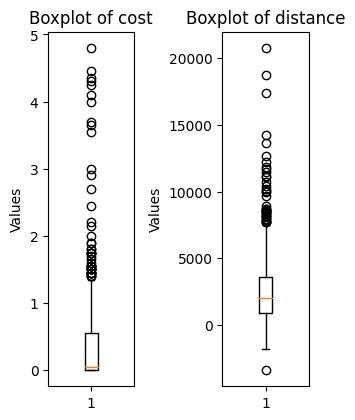

In [20]:
# Verify irregularities are gone with boxplots
plt.figure(figsize=(12, 8))

for i, column in enumerate(bikes[['cost', 'distance']].columns):
    plt.subplot(2, len(num_cols), i+1) 
    plt.boxplot(bikes[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel('Values')

plt.tight_layout()
plt.show()

There are still some outliers in distance, mainly negative numbers. Let's explore them next.

<h4> Cost summary </h4>
There were three irregularities within the cost bracket that I could find. Those irregularities were probably due to the return being late which results in a 100 € fine as per https://kaupunkipyorat.kuopio.fi/hinnasto.html. They've been removed, however, due to the effects on average costs.

In [21]:
'''
Analysis for distance
'''

# find rows with negative distance and explore
print(f"Amount of rows with negative distance: {len(bikes[bikes['distance'] < 0])}")

Amount of rows with negative distance: 39


Some can be explained by people just unlocking the bike and then stopping the usage, however there still are some rows where the duration and distance do not support it. For instance, as seen below, there are rows where the duration is multiple minutes and the distance is negatice by more than 100 meters. This should also be reported.

In [22]:
bikes[(bikes['distance'] < 0) & (bikes['location_from'] == bikes['location_to'])]

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
23,single,0.15,5,TASAVALLANKATU,TASAVALLANKATU,138.0,-150,1,0.2,0.0
60,season,0.00,8,MICROTEKNIA,MICROTEKNIA,41.0,-20,1,0.0,0.0
62,single,0.10,8,KEILANKANTA,KEILANKANTA,73.0,-30,1,0.0,0.0
96,single,0.05,5,TORI,TORI,48.0,-10,1,0.0,0.0
125,savonia,0.00,10,KAUPPAKATU,KAUPPAKATU,48.0,-20,1,0.0,0.0
284,single,0.15,4,KAUPPAKATU,KAUPPAKATU,178.0,-50,1,0.2,0.0
295,season,0.00,8,KAUPPAKATU,KAUPPAKATU,79.0,-60,1,0.0,0.0
322,savonia,0.00,10,KYS,KYS,70.0,-10,1,0.0,0.0
384,season,0.00,8,PUIJONLAAKSO,PUIJONLAAKSO,221.0,-10,1,1.0,0.0
410,single,0.05,8,TORI,TORI,39.0,-10,1,0.0,0.0


In [23]:
bikes[(bikes['distance'] < 0) & (bikes['location_from'] != bikes['location_to'])]

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
242,savonia,0.00,10,TORI,KAUPPAKATU,207.0,-180,1,3.3,0.0
318,single,0.45,8,KYS,PUIJONLAAKSO,480.0,-880,1,0.0,0.0
462,single,0.50,8,PUIJONLAAKSO,TORI,570.0,-1770,1,0.0,0.0
474,single,0.30,8,KAUPPAKATU,TORI,313.0,-270,1,0.0,0.0
494,savonia,0.00,10,TORI,KAUPPAKATU,207.0,-180,1,3.3,0.0
576,single,0.50,4,KYS,KAUPPAKATU,558.0,-1770,0,0.0,0.0
872,single,0.40,5,TORI,SATAMA,453.0,-870,1,0.0,0.0
1046,season,0.00,10,TORI,KAUPPAKATU,216.0,-210,1,0.7,0.0
1061,season,0.00,5,TORI,KAUPPAKATU,393.0,-220,1,0.0,0.0
1145,single,0.25,5,KAUPPAKATU,TORI,250.0,-240,1,0.0,0.0


In [24]:
bikes['distance'] = bikes['distance'].apply(abs)

<h4> Distance summary </h4>
Negative values were found and appropriately handled. It was verified withing Google Maps that the negative distances, if turned positive, we're in the approximate range of the locations from and to mentioned.

In [25]:
'''
Analysis for month
'''
# nothing irregular in months. 
# They seem to be within reasonable seasons as well, starting from April and ending in October
bikes['month'].unique()

array([ 9,  5, 10,  6,  8,  7,  4])

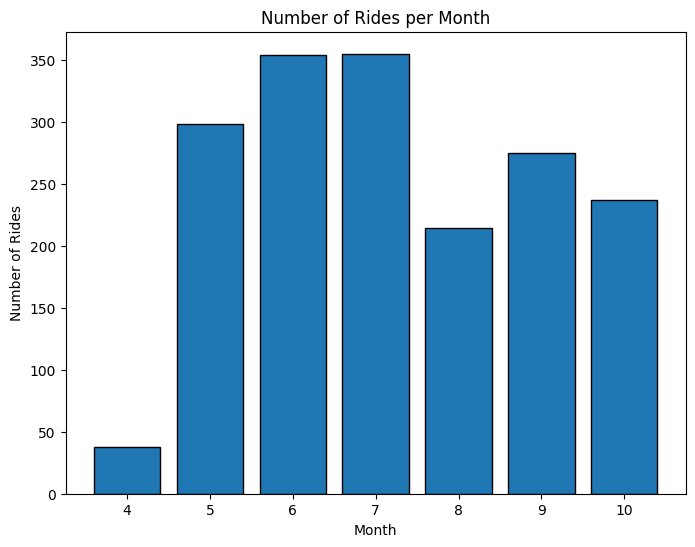

In [26]:
# Get a grasp of bike rides per month
rides_per_month = bikes.groupby('month').size().reset_index(name = 'ride_count')

# Create a plot
plt.figure(figsize=(8, 6))
plt.bar(rides_per_month['month'], rides_per_month['ride_count'], edgecolor = 'black')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.title('Number of Rides per Month')
plt.xticks(bikes['month'].unique())
plt.show()

As expected, there are more riding going during the summer months. There seems to be slight spike in September, however, which could be explained by school starts

<h4> Month summary </h4>
Nothing irregular within months were found. 

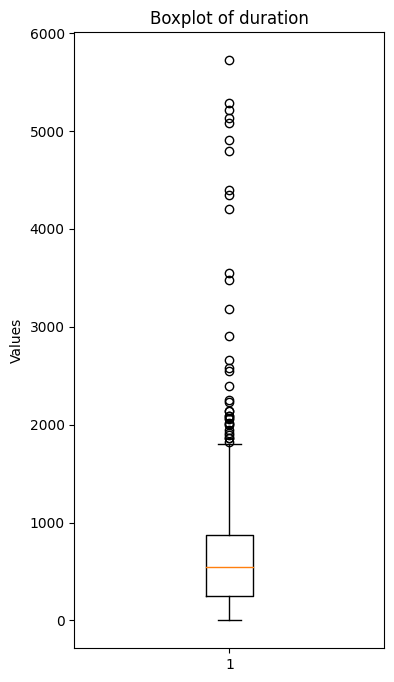

In [27]:
'''
Analysis for duration
'''
plt.figure(figsize = (4,8))
plt.boxplot(bikes['duration'])
plt.title(f'Boxplot of duration')
plt.ylabel('Values')
plt.xlabel('')
plt.show()

There seems to be a few rides which've exceeded 1 hr (> 4000 seconds). Could be reasonable to explore

In [28]:
bikes[bikes['duration'] > 4000]

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
497,single,4.25,9,TORI,KAUPPAKATU,5078.0,9970,1,81.0,20.4
555,single,3.65,8,KEILANKANTA,KAUPPAKATU,4345.0,14240,1,140.6,31.8
657,single,4.35,6,TORI,TORI,5214.0,8680,1,71.8,20.1
705,single,3.55,6,PUIJONLAAKSO,PUIJONLAAKSO,4207.0,17410,1,144.9,56.4
1202,single,4.10,8,NEULAMÄKI,NEULAMÄKI,4911.0,20770,1,124.2,52.2
1430,single,4.45,6,SATAMA,SATAMA,5285.0,11440,1,71.0,24.3
1501,single,4.80,6,KAUPPAKATU,KAUPPAKATU,5722.0,3150,1,21.6,6.0
1649,single,4.00,5,TORI,TORI,4793.0,11200,1,98.3,55.5
1759,single,4.30,5,KEILANKANTA,KEILANKANTA,5136.0,18720,1,133.4,22.2
1767,single,3.70,5,TORI,KAUPPAKATU,4400.0,5830,1,39.8,13.5


I believe nothing funny is going on here, people've just done some leisure riding.

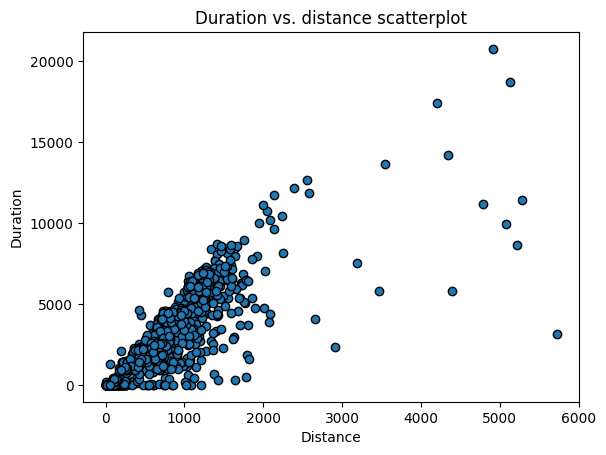

In [29]:
plt.scatter(bikes['duration'], bikes['distance'], edgecolor = 'black')
plt.title('Duration vs. distance scatterplot')
plt.ylabel('Duration')
plt.xlabel('Distance')
plt.show()

The scatterplot further supports that duration is more or less ok

<h4> Duration summary </h4>
Nothing out of ordinary I could find

<h4> Numerical summary </h4>
There were a few hiccups here and there, and they've been dealt with accordingly. For example, cost had a few outliers which could've been due to a bug. Distance also had a few negative values which were checked from Google Maps to be completely possible if just turned positive. Cost outliers were removed and distance values were fixed. Energy collected and used were left untouched since the initial describe() and boxplots showed nothing out of ordinary. 

Cost were dropped because they didn't match the cost formula presented in kaupunkipyorat.kuopio.fi/hinnasto and thus could distort further analysis. Distances were fixed so that they don't distort future analysis.

<h3> Data exploration </h3>

<h4> For each ticket type, calculate the number of trips made, the total distance travelled, the total time travelled and the total amount of fees paid. Examine your results and make comments about the customers. </h4>

In [40]:
# Group by 'ticket' and calculate the statistics
ticket_stats = bikes.groupby('ticket').agg({
    'distance': 'sum',
    'duration': 'sum',
    'cost': 'sum',
    'ticket': 'size'
})

ticket_stats['distance'] = ticket_stats['distance'] / 1000
ticket_stats['duration'] = ticket_stats['duration'] / 3600


# Rename columns for clarity
ticket_stats = ticket_stats.rename(columns={
    'ticket': 'Total Trips',
    'distance': 'Total Distance (km)',
    'duration': 'Total Time (hours)',
    'cost': 'Total Fees Paid'
}).reset_index()

In [41]:
ticket_stats

,ticket,Total Distance (km),Total Time (hours),Total Fees Paid,Total Trips
0,savonia,495.26,39.276667,2.00,252
1,season,1315.88,90.545278,3.00,553
2,single,2559.67,180.430000,566.45,966


There still seems to be some fees paid in savonia and seasonal, even though I though they were paid in beforehand. 
However it'd seem that the single ticket is the most popular by a wide margin, judging by total distance, hours and trips. 

I believe it's due to just ease of use and the fact that people don't want to 'tie' themselves to using these bikes by subscribing to a seasonal ticket. Also, as there are 118000 inhabitants in Kuopio, where 4500 are students (https://www.savonia.fi/opiskele-tutkinto/savonia-yhteishaku-2021/opiskelu-kuopion-alueella/), that would explain why the Savonia ticket is so unpopular; it doesn't have that many eligible users. 

<h4> For each ticket type, visualise the monthly rental activity in terms of the total distance travelled. Examine your results and make comments about the development of the rental activity over time. </h4>

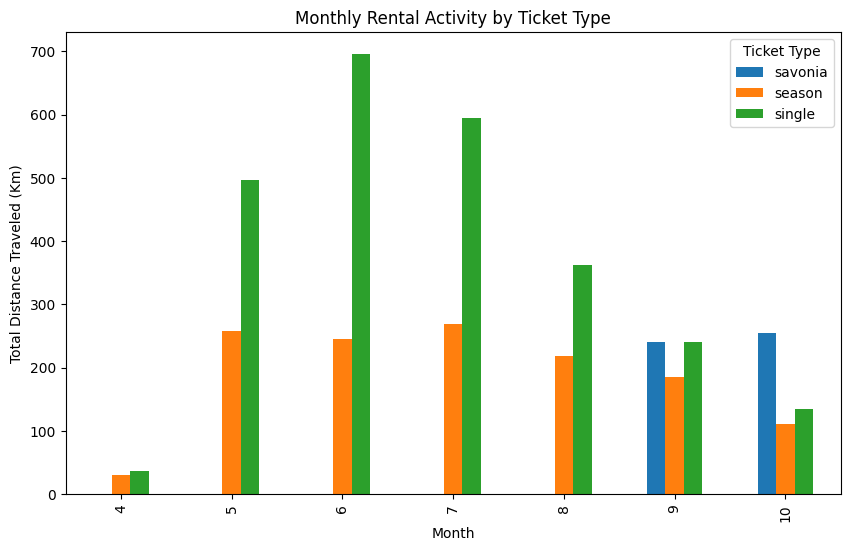

In [42]:
# Group the data by 'month' and 'ticket' and calculate the total distance traveled
monthly_distance = bikes.groupby(['month', 'ticket'])['distance'].sum().unstack()

# Turn distance into kilometers for readability
monthly_distance = monthly_distance / 1000

monthly_distance.plot(kind = 'bar', figsize=(10, 6))

# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('Total Distance Traveled (Km)')
plt.title('Monthly Rental Activity by Ticket Type')
plt.legend(title = 'Ticket Type')
plt.show()

As one might expect, there's only a handful of riding done in April. This is probably due to weather conditions. Also, according to https://kaupunkipyorat.kuopio.fi/hinnasto.html, bikes become available from 24.4., which also explains the small percentage of usage; people only have a week or so to ride in April.

Then, once summer goes on, riding steadily grows to a peak in June, and then starts it's decline towards autumn. This holds true, however, for single tickets. There's not much fluctuation within seasonal tickets although they follow the same pattern of declining towards colder weathers.

The savonia tickets only see use once schools start, from september to october. This makes sense as they're exclusive to students and staff of Savonia AMK. 

<h4> Find the three stations that have the highest total deficit of bikes (i.e. the largest negative difference between the number of arrived bikes and the number of departured bikes) and the three stations that have the highest total surplus of bikes (i.e. the largest positive difference). Examine your results and make suggestions about how bikes could be relocated. </h4>

In [44]:
bikes['location_from'].value_counts()

TORI              418
KAUPPAKATU        237
SATAMA            200
MICROTEKNIA       182
PUIJONLAAKSO      161
NEULAMÄKI         155
KEILANKANTA       153
TASAVALLANKATU    143
KYS                94
PIRTTI             28
Name: location_from, dtype: int64

In [45]:
bikes['location_to'].value_counts()

TORI              400
KAUPPAKATU        287
PUIJONLAAKSO      190
MICROTEKNIA       174
SATAMA            163
TASAVALLANKATU    156
NEULAMÄKI         155
KEILANKANTA       142
KYS                75
PIRTTI             29
Name: location_to, dtype: int64

In [56]:
# Calculate the net change in bikes for each station
deficit_surplus = (bikes['location_to'].value_counts() - bikes['location_from'].value_counts()).reset_index()
deficit_surplus.columns = ['Station', 'Net Change']

# Sort stations by net change (deficit or surplus)
deficit_stations = deficit_surplus.sort_values(by = 'Net Change', ascending = True).head(3)
surplus_stations = deficit_surplus.sort_values(by = 'Net Change', ascending = False).head(3)

print("Top 3 Stations with Highest Deficit:")
print(deficit_stations)

print("\nTop 3 Stations with Highest Surplus:")
print(surplus_stations)


Top 3 Stations with Highest Deficit:
  Station  Net Change
7  SATAMA         -37
2     KYS         -19
9    TORI         -18

Top 3 Stations with Highest Surplus:
          Station  Net Change
0      KAUPPAKATU          50
6    PUIJONLAAKSO          29
8  TASAVALLANKATU          13


The three stations with highest net deficit seem to have one characteristic in common; they're all places where people leave and don't return during the same trip. You arrive to the harbour from your cruise but you probably won't arrive during the same day. You leave from the hospital but rarely have a reason to return. Same with Tori; you'll just grab a bike and go home with it.

on the contrary, Kauppakatu is a place where you arrive from someplace else and leave with some other means than bike. Puijonlaakso however isn't so self-explanatory. I didn't find any attractions or similar from Google Maps so this isn't so clear to me. Apparently there's something of interest there. Tasavallankatu is the same; no apparent reason why bikes would be left there more than taken. 

Bikes could be relocated from Kauppakatu to the harbour as there are the largest surpluses and deficits. Puijonlaakso could be redistributed to KYS and Tori. Tasavallankatu could be used to patch other deficit areas.

<h4> For each trip in the data set, calculate its net energy gain, which is defined as the difference between the energy collected and consumed during a trip. Visualise the distribution of this new variable. Make comments about how much battery levels tend to change during trips. </h4>

In [71]:
bikes['energy_gain'] = bikes['energy_collected'] - bikes['energy_used']

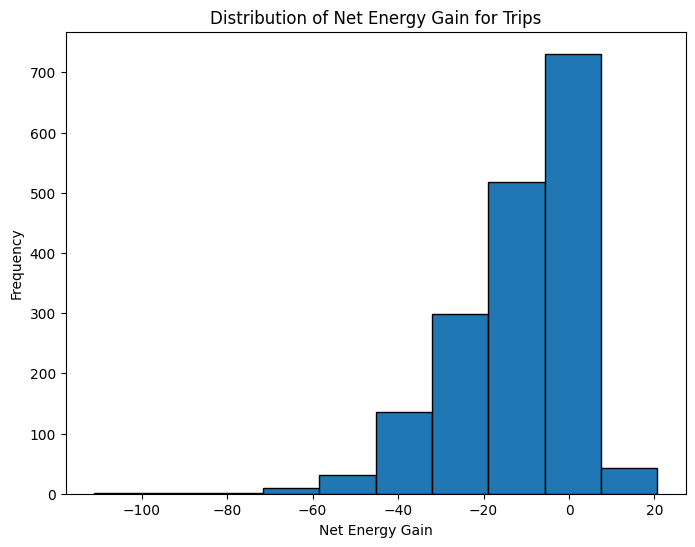

In [75]:
# Visualize the distribution of net energy gain
plt.figure(figsize = (8, 6))
plt.hist(bikes['energy_gain'], bins = 10, edgecolor = 'black')
plt.xlabel('Net Energy Gain')
plt.ylabel('Frequency')
plt.title('Distribution of Net Energy Gain for Trips')
plt.show()

As one might expect, battery levels tend to decrease during trips, however most poeple seem to reach net gain of -20-0, indicating that the changes aren't that radical.

In [76]:
bikes['assistance'].value_counts()

1    1624
0     147
Name: assistance, dtype: int64

In [77]:
bikes['energy_gain'].mean()

-11.736194240542066

Vast majority of people seem to drive with assistance on as well, so the above histogram supports that, on average, rides net a negative of 11 kwH.

<h3> Hypothesis testing </h3>

<h4> Is there statistical evidence to claim that the travel times tend to be shorter or longer for the single than for the season ticket type. Justify your design choices, interpret the results and use your discoveries to make conclusions about customers.</h4>

Null Hypothesis (H0): The mean travel time for the single ticket type is equal to the mean travel time for the season ticket type.
<br>Alternative Hypothesis (H1): The mean travel time for the single ticket type is not equal to the mean travel time for the season ticket type.

In [79]:
# Separate data into two groups based on ticket type
single_tickets = bikes[bikes['ticket'] == 'single']['duration']
season_tickets = bikes[bikes['ticket'] == 'season']['duration']

In [83]:
print(f"{len(single_tickets)} samples of single tickets")
print(f"{len(season_tickets)} samples of season tickets")

966 samples of single tickets
553 samples of season tickets


sample sizes are reasonably large (typically considered as 30 or more observations in each group), violations of the normality assumption may be less critical due to the Central Limit Theorem, which states that the sampling distribution of the sample mean becomes approximately normal as the sample size increases.

In [84]:
# Perform Levene's test for equal variances
statistic, p_value = stats.levene(single_tickets, season_tickets)

# Set significance level (alpha)
alpha = 0.05

# Print the results
print(f'Statistic: {statistic:.4f}')
print(f'P-value: {p_value:.4f}')

# Check for equal variances
if p_value < alpha:
    print("Reject the null hypothesis. Variances are significantly different.")
else:
    print("Fail to reject the null hypothesis. Variances are not significantly different.")

Statistic: 4.9779
P-value: 0.0258
Reject the null hypothesis. Variances are significantly different.


Since variances are significantly different, two-sample-t-test is out the window.

In [85]:
# Perform Welch's t-test for unequal variances
t_statistic, p_value = stats.ttest_ind(single_tickets, season_tickets, equal_var = False)

# Significance level (alpha)
alpha = 0.05

print(f'T-statistic: {t_statistic:.4f}')
print(f'P-value: {p_value:.4f}')

# Check for statistical significance
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence of a difference in travel times.")
else:
    print("Fail to reject the null hypothesis. There is no evidence of a difference in travel times.")

T-statistic: 2.9160
P-value: 0.0036
Reject the null hypothesis. There is evidence of a difference in travel times.


If the t-statistic is positive, it means that the travel times for the first group (e.g., 'single' ticket type) are longer on average compared to the second group (e.g., 'season' ticket type).

As there is evidence of shorter rides for single fares, this could indicate that the bikes are used similarly to Voi Scooters in Turku; people want to get quickly and easily from point A to point B where the distance between A and B is relatively short.

<h4> Is there statistical evidence to claim that the travel distance positively correlates with the average rate at which electricity is consumed during the trip? Justify your design choices, interpret the results and use your discoveries to make conclusions about customers. </h4>

Null Hypothesis (H0): There is no significant correlation between travel distance and the average rate of electricity consumption during a trip (Pearson correlation coefficient = 0).
<br>Alternative Hypothesis (H1): There is a significant positive correlation between travel distance and the average rate of electricity consumption during a trip (Pearson correlation coefficient ≠ 0).

In [92]:
# Separate data
energy_consumption = bikes['energy_gain']
distance = bikes['distance']

Since Pearson Correlation Coefficient assumes normal distribution, let's test for that first

In [93]:
# Perform the Shapiro-Wilk test for normali distribution
_, p_value_distance = stats.shapiro(distance)
_, p_value_consumption = stats.shapiro(energy_consumption)

# Signifigance
alpha = 0.05

# Print the results for travel distance
print("Shapiro-Wilk Test for Travel Distance:")
print(f'P-value: {p_value_distance:.4f}')

if p_value_distance < alpha:
    print("Reject the null hypothesis. The data for travel distance is not normally distributed.")
else:
    print("Fail to reject the null hypothesis. The data for travel distance follows a normal distribution.")

# Print the results for electricity consumption rate
print("\nShapiro-Wilk Test for Electricity Consumption Rate:")
print(f'P-value: {p_value_consumption:.4f}')

if p_value_consumption < alpha:
    print("Reject the null hypothesis. The data for electricity consumption rate is not normally distributed.")
else:
    print("Fail to reject the null hypothesis. The data for electricity consumption rate follows a normal distribution.")

Shapiro-Wilk Test for Travel Distance:
P-value: 0.0000
Reject the null hypothesis. The data for travel distance is not normally distributed.

Shapiro-Wilk Test for Electricity Consumption Rate:
P-value: 0.0000
Reject the null hypothesis. The data for electricity consumption rate is not normally distributed.


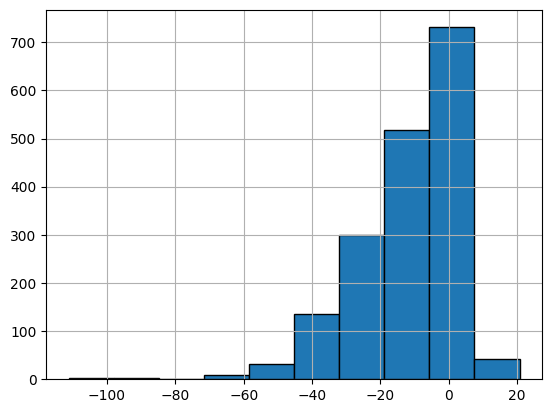

In [102]:
# Determine distributions (I should've remembered that energy consumption isn't normally distributed
# from the histogram from before)

energy_consumption.hist(bins = 10, edgecolor = 'black')
plt.show()

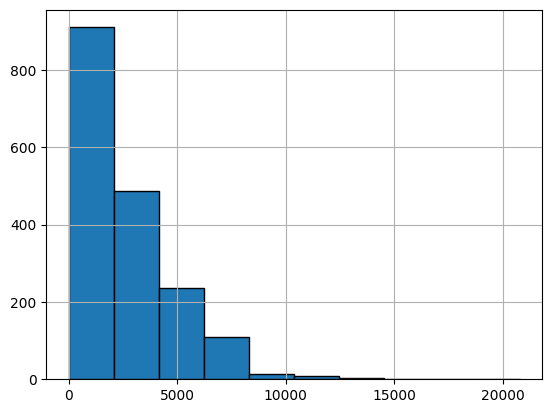

In [101]:
distance.hist(bins = 10, edgecolor = 'black')
plt.show()

In [104]:
# Since the data is skewed, Spearman Rank test seems appropriate

# Perform Spearman rank correlation test
correlation_coefficient, p_value = stats.spearmanr(distance, energy_consumption)

# Significance level (alpha)
alpha = 0.05

print(f'Spearman Rank Correlation Coefficient: {correlation_coefficient:.4f}')
print(f'P-value: {p_value:.4f}')

# Check for statistical significance
if p_value < alpha:
    print("Reject the null hypothesis. There is a statistically significant correlation.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant correlation.")

Spearman Rank Correlation Coefficient: -0.7006
P-value: 0.0000
Reject the null hypothesis. There is a statistically significant correlation.


There seems to be statistical evidence that the longer the trips, the larger the energy consumption.

<h4> Is there statistical evidence to claim that the savonia ticket type differs from the others with respect to how often the electric assistance is used? Justify your design choices, interpret the results and use your discoveries to make conclusions about customers.</h4>

The chi-squared test is suitable for analyzing the association between two categorical variables.


Null Hypothesis (H0): There is no significant association between the ticket type (including Savonia) and the use of electric assistance.
<br>Alternative Hypothesis (H1): There is a significant association between the ticket type (including Savonia) and the use of electric assistance.

In [123]:
# Create a contingency table (reference: https://en.wikipedia.org/wiki/Contingency_table)

# Create a temporary table where tickets are savonia and other
temp_table = bikes[['ticket', 'assistance']].copy()
temp_table.loc[temp_table['ticket'] != 'savonia', 'ticket'] = "other"

contingency_table = pd.crosstab(temp_table['ticket'], temp_table['assistance'])

# Chi-squared test for independence
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

# Significance level (alpha)
alpha = 0.05

print(f'Chi-Squared Statistic: {chi2:.4f}')
print(f'P-value: {p_value:.4f}')

# Check for statistical significance
if p_value < alpha:
    print("Reject the null hypothesis. There is a statistically significant association.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant association.")

Chi-Squared Statistic: 11.2146
P-value: 0.0008
Reject the null hypothesis. There is a statistically significant association.


In [125]:
contingency_table

assistance,0,1
ticket,,
other,112,1407
savonia,35,217


There is a statistically significant association with Savonia ticket riders differ from others. It would appear that they use assistance significantly less. It could be that the riders of Savonia AMK are more climatically aware and opt-out of using electricity for cycling. Other could be that they're just in it for exercise.

<h5> (2p) Choose either (A) or (B) below.


(A) Formulate your own hypothesis about the use of rental electric bikes. Explain why your hypothesis would be important to explore. Describe how the hypothesis could be tested. (You do not have to perform the analysis.)


(B) Point out one or more problems in the questions asked or the approaches used above. Propose changes to address the problem(s). Explain how the changes would improve the statistical analysis. </h5>

Hypothesis: The usage of rental electric bikes increases during the summer months compared to the autumn months.

Exploring the seasonality of rental electric bike usage could be interesting for several reasons:

Bike rental businesses can optimize their operations, including bike maintenance and staffing, based on seasonal fluctuations in demand. If there is a clear trend of increased bike usage during the summer, they can prepare accordingly.

Also understanding the seasonality of bike usage allows businesses to tailor their marketing efforts. They can focus promotional campaigns on attracting more customers during peak seasons.

Other municipalities can use this information to plan and invest in bike infrastructure, such as bike lanes and parking facilities, to accommodate higher usage during certain times of the year.


Data Analysis:

Calculate the average monthly usage for both summer and fall months.
Perform a statistical test (e.g., t-test or ANOVA) to compare the means of summer and winter bike usage. The null hypothesis would be that there is no significant difference between the two seasons.